### **Objectives**

**Identify Features: Use historical customer data to find important characteristics (features) that influence churn. These may include:

Usage Behavior: How often customers use the service, features they access, and engagement levels.
Customer Demographics: Age, gender, location, subscription plan, and tenure with the service.

In [82]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data=pd.read_csv("E:/CUSTOMER CHURN/Churn_Modelling.csv") # Load the dataset

In [28]:
data.head() #foe displaying first 5 rows of dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
data.info()  # Handling missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* **so we can see there is no missing value**

In [30]:
data.columns # showing all the columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [31]:
# Preprocessing: Drop irrelevant columns
data.drop(['RowNumber', 'Surname'], axis=1, inplace=True)

In [32]:
# Encode categorical variables (Geography and Gender)
df = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

In [33]:
df.head(4)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,False,False,False


In [34]:
df[df.columns[df.dtypes == 'bool']] = df[df.columns[df.dtypes == 'bool']].astype(int)  # Convert boolean columns to integer
df.sample(6)  # Display the random 6 rows

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
3508,15614230,426,34,3,0.00,2,1,1,61230.83,0,0,0,0
6851,15779103,527,39,9,96748.89,2,1,0,94711.43,0,1,0,0
8611,15617029,596,30,1,0.00,2,1,0,8125.39,0,0,1,0
9118,15804052,710,23,6,0.00,2,1,1,134188.11,0,0,1,1
8105,15635116,659,60,2,0.00,1,1,0,177480.45,1,0,1,1
6140,15785042,488,31,8,97588.60,1,0,0,124210.53,0,0,0,0


## outlier Detection 

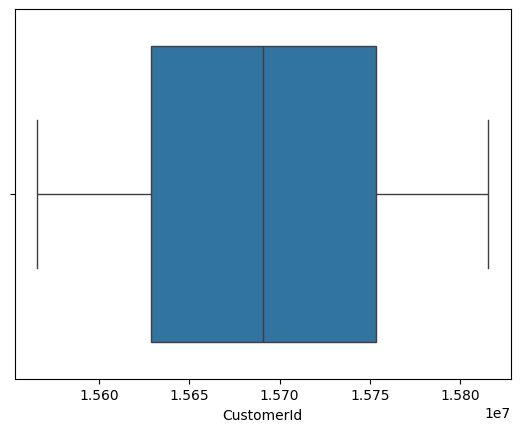

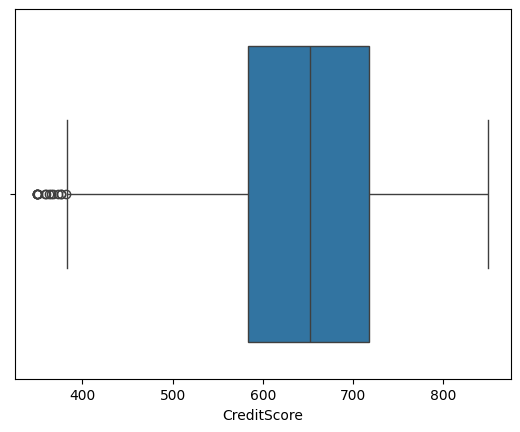

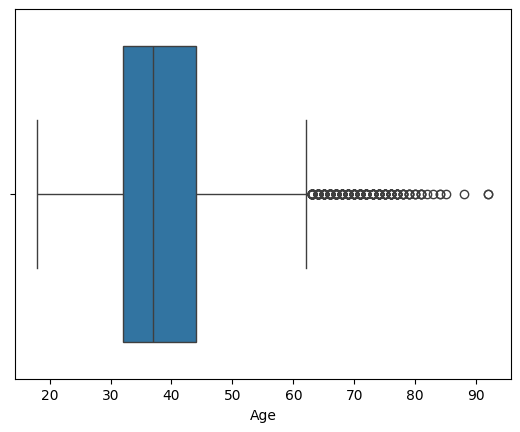

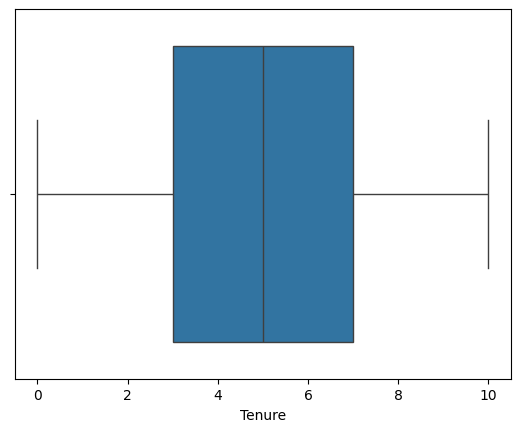

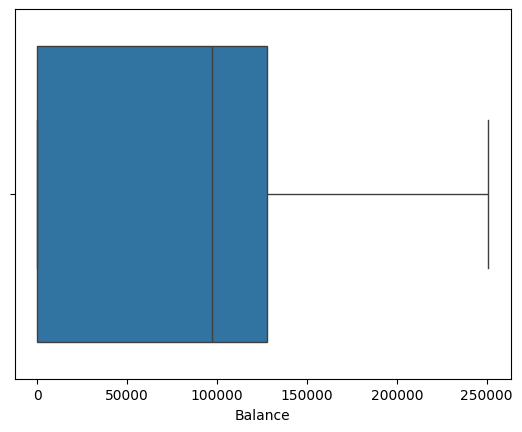

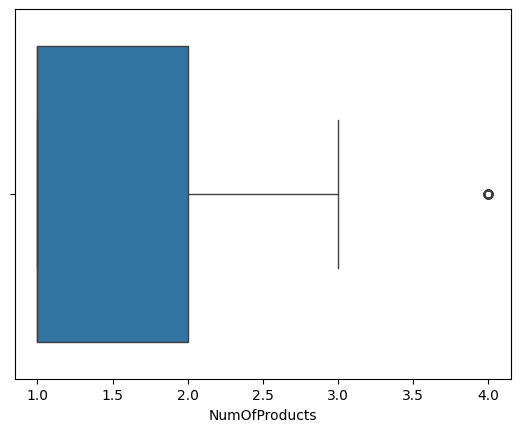

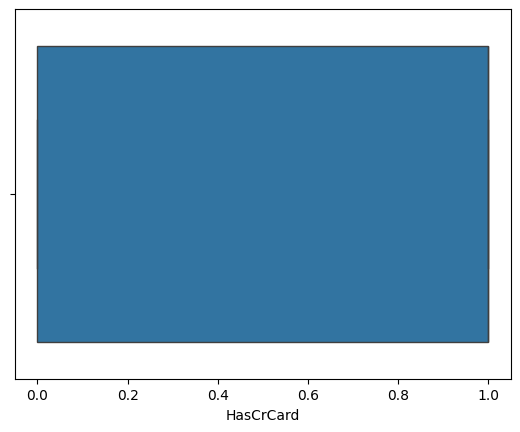

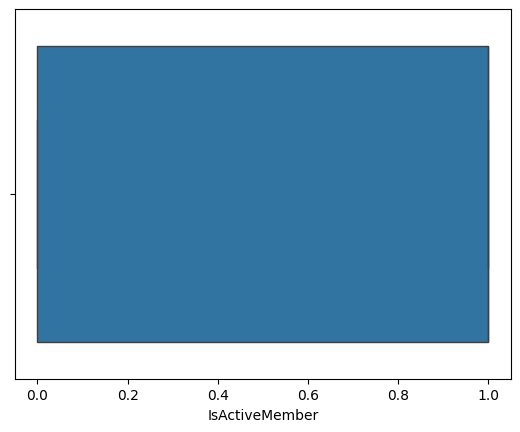

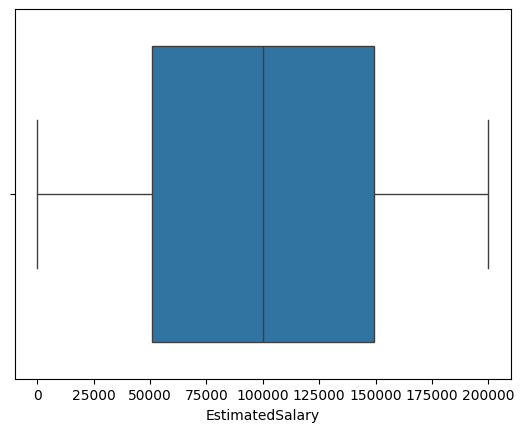

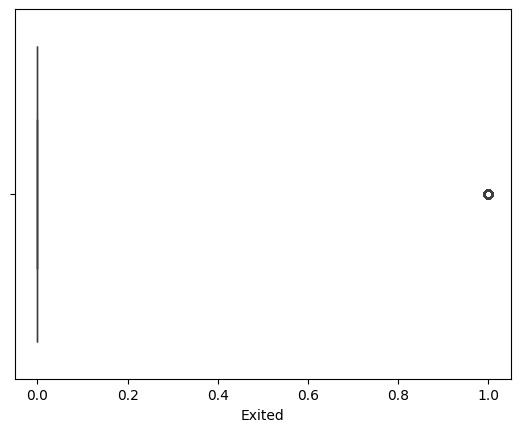

In [35]:
#check for outliers using seaborn
# Create box plots for each numerical feature
for col in data.select_dtypes(include=np.number).columns:
    sns.boxplot(x=data[col])
    plt.show()

In [37]:
df.describe ()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


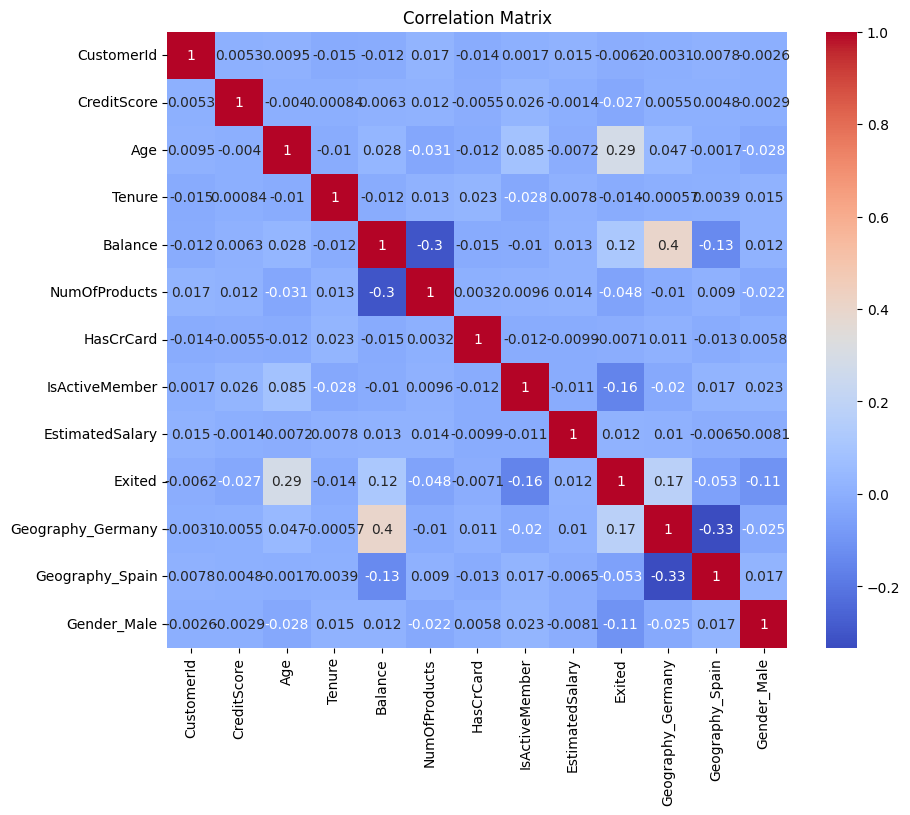

In [76]:
# Calculate the correlation matrix
corr_matrix = df.corr()
# Set the figure size
plt.figure(figsize=(10, 8))
# Create a heatmap to visualize the correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [80]:
# Calculate the correlation matrix
corr_matrix = df.corr()
corr_matrix

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248,-0.003097,0.007800,-0.002641
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512


**These values indicate that there is a moderate positive correlation between Balance and Geography_Germany, and a moderate positive correlation between Exited and Age.**

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [40]:
# Split the data into features and target
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler
# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
# Evaluate each model
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_log_reg))
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy:  0.8105

Logistic Regression Confusion Matrix:
 [[1543   64]
 [ 315   78]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [50]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy:  0.8665

Random Forest Confusion Matrix:
 [[1545   62]
 [ 205  188]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [51]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy: ", accuracy_score(y_test, y_pred_gb))
print("\nGradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy:  0.8655

Gradient Boosting Confusion Matrix:
 [[1541   66]
 [ 203  190]]

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [62]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

import xgboost as xgb

# XGBoost Classifier
xg_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xg_clf.fit(X_train, y_train)
y_pred_xg = xg_clf.predict(X_test)

# AdaBoost Classifier
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)

# Evaluate each model
models = {
    "Decision Tree": y_pred_dt,
    "XGBoost": y_pred_xg,
    "AdaBoost": y_pred_ab

}

for model_name, y_pred in models.items():
    print(f"\n{model_name} Accuracy: ", accuracy_score(y_test, y_pred))
    print(f"{model_name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))

C:\Users\MEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:46:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\MEW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Decision Tree Accuracy:  0.7805
Decision Tree Confusion Matrix:
 [[1351  256]
 [ 183  210]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1607
           1       0.45      0.53      0.49       393

    accuracy                           0.78      2000
   macro avg       0.67      0.69      0.67      2000
weighted avg       0.80      0.78      0.79      2000


XGBoost Accuracy:  0.8565
XGBoost Confusion Matrix:
 [[1515   92]
 [ 195  198]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.68      0.50      0.58       393

    accuracy                           0.86      2000
   macro avg       0.78      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000


AdaBoost Accuracy:  0.8555
AdaBoost Confusion Matrix:
 [[1520   87]
 [ 202  191]]
AdaBoost Classifica

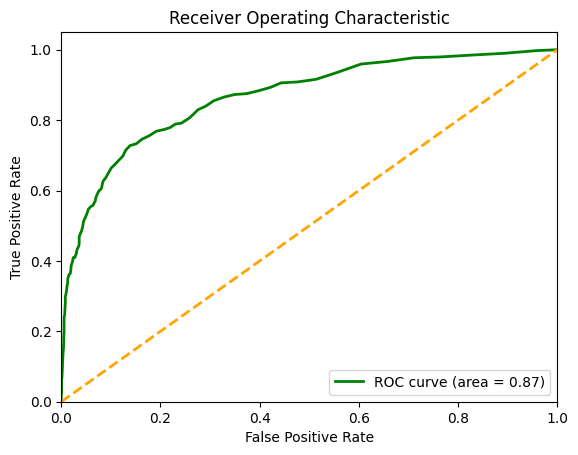

In [72]:
from sklearn.metrics import roc_curve, auc
# Get probabilities
y_prob = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [74]:
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                   importance
Age                  0.222452
NumOfProducts        0.126474
Balance              0.118702
CustomerId           0.118429
EstimatedSalary      0.117810
CreditScore          0.116262
Tenure               0.068566
IsActiveMember       0.039376
Geography_Germany    0.025710
Gender_Male          0.017736
HasCrCard            0.015881
Geography_Spain      0.012600


**We can see that Age is the most important feature, followed by NumOfProducts and Balance. Features like Geography_Spain and HasCrCard have the least importance in your model.**

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}


### Logistic Regression

**Accuracy:** 0.8105

**Precision:** 0.83 (class 0), 0.55 (class 1)

**Recall:** 0.96 (class 0), 0.20 (class 1)

**F1-Score:** 0.89 (class 0), 0.29 (class 1)

### Random Forest

**Accuracy:** 0.8665

**Precision:** 0.88 (class 0), 0.75 (class 1)

**Recall:** 0.96 (class 0), 0.48 (class 1)

**F1-Score:** 0.92 (class 0), 0.58 (class 1)

### Gradient Boosting

**Accuracy:** 0.8655

**Precision:** 0.88 (class 0), 0.74 (class 1)

**Recall:** 0.96 (class 0), 0.48 (class 1)

**F1-Score:** 0.92 (class 0), 0.59 (class 1)

### Decision Tree

**Accuracy:** 0.7805

**Precision:** 0.88 (class 0), 0.45 (class 1)

**Recall:** 0.84 (class 0), 0.53 (class 1)

**F1-Score:** 0.86 (class 0), 0.49 (class 1)

### XGBoost

**Accuracy:** 0.8565

**Precision:** 0.89 (class 0), 0.68 (class 1)

**Recall:** 0.94 (class 0), 0.50 (class 1)

**F1-Score:** 0.91 (class 0), 0.58 (class 1)

### AdaBoost

**Accuracy:** 0.8555

**Precision:** 0.88 (class 0), 0.69 (class 1)

**Recall:** 0.95 (class 0), 0.49 (class 1)

**F1-Score:** 0.91 (class 0), 0.57 (class 1)

From these results, it seems that **Random Forest and Gradient Boosting** have the highest accuracy and balanced performance across precision, recall, and F1-score. However, the choice of the best model might depend on the specific requirements of your application, such as the importance of precision versus recall for class 1.